# Quantum Particle Models

This notebook aims to create several Quantum Particle Models  with different potentials and different wavefunctions. The goal is to generate the code and graphs that can analyze both the Particle in a Box model and a Simple Harmonic Osccilator Model. 

In [1]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import sympy as smp
import pandas

## Particle in a Box

### Particle in a Box Wavefuntions

We begin with the Schrödinger Equation. Solving this equation for the given conditions will give us the wavefunction of our system. 
The wavefunction can be found as: $$ i\hbar\frac{\partial}{\partial t}\psi(x,t) = - \frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}\psi(x,t) + V(x)\psi(x,t)$$ 
The Particle in a box model is predicated on the idea that inside of the box the potential is 0 and outside it is infinite. With this we know that our wavefunction will follow a basic form: $$ \psi(x) = A\sin{kx} $$ where A is a normalization constant. To find the normalization constant, we set the integral over all space of the square of the wavefunction to 1 and solve for A.


In [20]:
#Defining our basic wavefunction
psi, A, ksym, xsym, Lsym, nsym, Esym, msym, hsym, hbarsym = smp.symbols('psi A k x L n E m h hbar')
psi_x = A*smp.sin((nsym*smp.pi)/(Lsym)*xsym)
psi_x

A*sin(pi*n*x/L)

We now solve for our normalization constant by finding A over all space (AS) when: $$ \int_{AS} \psi^*\psi dx = 1 $$

In [9]:
#Solving for our constant A
psi_x_square = psi_x**2
NormConst = smp.integrate(psi_x_square, (xsym, 0, Lsym))
#smp.solveset(smp.Eq(NormConst, 1), A)
smp.solve(smp.Eq(smp.simplify(NormConst), 1), A)

[Piecewise((-2*sqrt(pi)*sqrt(n/(L*(2*pi*n - sin(2*pi*n)))), Ne(pi*n/L, 0)), (nan, True)),
 Piecewise((2*sqrt(pi)*sqrt(n/(L*(2*pi*n - sin(2*pi*n)))), Ne(pi*n/L, 0)), (nan, True))]

Now that we have a wavefunction for the particle model: $$ \psi_n(x) = \sqrt{\frac{2}{L}}\sin{\frac{n\pi}{L}x} \: (n = 1,2,3,...)$$ we can now construct our basic particle in a box.

In [5]:
#Constants 
pi = np.pi 
L = 1 
n = np.arange(start = 1, stop = 5)
x = np.linspace(0,1,200)

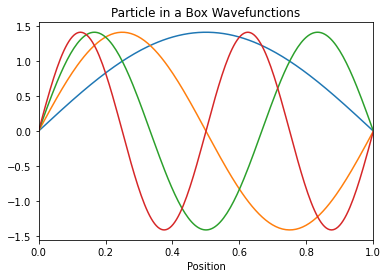

In [6]:
def PIBWF(n):  #PIB Wavefunction
    return np.sqrt(2/L)*np.sin((n*pi*x)/L)  

#Creating a Plot with the first four principle quantum numbers.  
fig = plt.subplots()
for j in range(1, max(n+1)):
    plt.plot(x,PIBWF(j))
    plt.xlim(0,1)

    matplotlib.rcParams['font.serif'] = 'Palatino'
    matplotlib.rcParams['font.family'] = 'serif'

    #plt.legend(loc = 'upper right')
    plt.title('Particle in a Box Wavefunctions')
    plt.xlabel('Position')

We can also find the probability density of the different wavefunctions. We have already briefly discussed these above, but essentially we square the wavefunction, and the resulting plot gives us the probability distribution of where the particle may be found in the model. As with most systems in Quantum Mechanics, the distributions are all normalized to 1, meaning that the integral of any one distribution will give 1. 


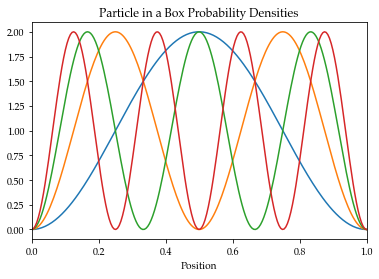

In [7]:
def PIBPD(n):  # Wavefunction Probability distribution
    return (np.sqrt(2/L)*np.sin((n*pi*x)/L))**2

fig = plt.subplots() #Plot of Probability Density Distribution for PIB
for j in range(1, max(n+1)):
    plt.plot(x,PIBPD(j))
    plt.xlim(0,1)


    matplotlib.rcParams['font.serif'] = 'Palatino'
    matplotlib.rcParams['font.family'] = 'serif'

    #plt.legend(loc = 'upper right')
    plt.title('Particle in a Box Probability Densities')
    plt.xlabel('Position')


### Energies in the Particle in a Box model

Energies in the PIB model are fairly simple. We can essentially derive the equation for energy by seeing that in this system with no potential energy, all of the energy values will be derived from kinetic energy with  1/2 mv<sup>2</sup>. The rest of the derivation will follow simply.

In [22]:
Esym = ((nsym**2*hsym**2)/(8*msym*Lsym**2))
Esym

h**2*n**2/(8*L**2*m)